<a href="https://colab.research.google.com/github/EinMenthos/CPSC483-ML/blob/main/CPSC_483_Homework_1_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CPSC 483 Homework 1**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/02_end_to_end_machine_learning_project.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

In [ ]:
import sys

assert sys.version_info >= (3, 10)

In [ ]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

##Download the housing dataset used in the textbook code


In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()


##A scatter plot of median_income and median_house_value

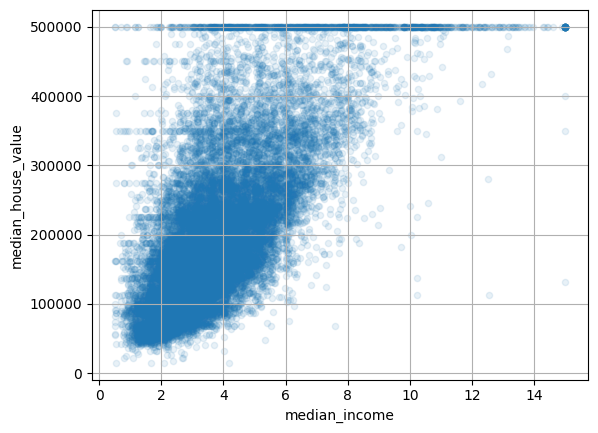

In [ ]:
import matplotlib.pyplot as plt
housing = housing_full.copy()
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

##Remove all rows where median_house_value >= 500,000

In [ ]:
print("Original Median House Values:\n")
housing_full["median_house_value"].value_counts()

Original Median House Values:



,count
median_house_value,
500001.0,965
137500.0,122
162500.0,117
112500.0,103
187500.0,93
...,...
476300.0,1
427200.0,1
440000.0,1


In [ ]:
housing_value_outlier = housing_full[housing_full.median_house_value >= 500000]
housing_no_outlier = housing_full.drop(housing_value_outlier.index)
print("Median House Values w/o Outliers:\n")
housing_no_outlier["median_house_value"].value_counts()

Median House Values w/o Outliers:



,count
median_house_value,
137500.0,122
162500.0,117
112500.0,103
187500.0,93
225000.0,92
...,...
361800.0,1
317600.0,1
476300.0,1


##Split data into test and train subsets with 20% in the test subset using random sampling



In [ ]:
from sklearn.model_selection import train_test_split

housing_full["income_cat"] = pd.cut(housing_full["median_income"],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])

strat_train_set, strat_test_set = train_test_split(
    housing_full, test_size=0.2, stratify=housing_full["income_cat"],
    random_state=42)

##Create a new variable in the train subset that is total_bedrooms/total_rooms.Calculate the correlation coefficient of this new variable with median_house_value. [show correlation coefficient]


In [ ]:
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
corr_matrix = housing.corr(numeric_only=True)
f'Correlation coefficient of bedrooms per room with median_house value is {corr_matrix["median_house_value"]["bedrooms_ratio"]}'

'Correlation coefficient of bedrooms per room with median_house value is -0.2558801494194979'

##Create a pre-processing pipeline that does the following:



For the categorical variable ocean_proximity, replace missing values with the most frequent value, followed by one-hot encoding


In [ ]:
# Jie
# from sklearn.impute import SimpleImputer


# imputer_most_frequent = SimpleImputer(strategy="most_frequent")
# train = strat_train_set.copy()
# ocean_prox = train["ocean_proximity"]
# imputer_most_frequent.fit(ocean_prox)
# imputer_most_frequent.statistics_

# imputer_median = SimpleImputer(strategy="median")

In [ ]:
housing_full['ocean_proximity'].value_counts()

#I don't see any missing values at ocean_primity

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

housing_train_cat = strat_train_set[['ocean_proximity']]
cat_processed_sparse = cat_pipeline.fit_transform(housing_train_cat)
feature_names = cat_pipeline.named_steps['one_hot'].get_feature_names_out([''])
cat_processed_df = pd.DataFrame(cat_processed_sparse.toarray(), columns=feature_names, index=housing_train_cat.index)
display(cat_processed_df.head())


,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0


For the numerical variables "housing_median_age", "total_rooms",                "total_bedrooms", "population", "households", and "median_income", replace missing values with the median


In [ ]:
import numpy as np
for col in numerical_cols:
    housing_train_num_imputed_df[col] = np.log1p(housing_train_num_imputed_df[col])
    housing_train_num = strat_train_set[numerical_cols].copy()

imputer = SimpleImputer(strategy='median')
housing_train_num_imputed_array = imputer.fit_transform(housing_train_num)

housing_train_num_imputed_df = pd.DataFrame(housing_train_num_imputed_array, columns=numerical_cols, index=housing_train_num.index)

display(housing_train_num_imputed_df.head())

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


followed by a log transform

 and then scaling to a 0-1 range.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
processed_numerical_data = scaler.fit_transform(housing_train_num_imputed_df)
processed_numerical_df = pd.DataFrame(processed_numerical_data, columns=numerical_cols, index=housing_train_num_imputed_df.index)
display(processed_numerical_df.head())

TODO: Create a new variable defined as total_bedrooms/total_rooms, then scaling to a 0-1 range.

TODO: How many variables are in the pre-processed training dataset?

##TODO: Add a LinearRegression model to the preprocessing pipeline. Use 3-fold cross validation to calculate the RMSE error on the training dataset. [Show RMSE error]


##TODO: What is the RMSE error on the test dataset?